This file should serve to read in the prepared data, separate it into X and y and try out the first models

In [ ]:
# import section, adding parameters in oder to accellerate the process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#nrows = 15000000
dateiName = "23_22_21-eea_europa_eu-CarsCO2_proc.csv"
fields = np.arange(19)
df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)
df.info()

C:\Users\T\AppData\Local\Temp\ipykernel_1116\4214266509.py:10: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dateiName, sep = ",", usecols= fields, index_col =0, header = 0)


<class 'pandas.core.frame.DataFrame'>
Index: 30134420 entries, 56002959 to 140000058
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   category_of_vehicle          object 
 5   fuel_type                    object 
 6   fuel_mode                    object 
 7   innovative_technologies      object 
 8   mass_vehicle                 float64
 9   weltp_test_mass              float64
 10  engine_capacity              float64
 11  engine_power                 float64
 12  erwltp                       float64
 13  year                         int64  
 14  electric_range               float64
 15  electric_energy_consumption  float64
 16  fuel_consumption             float64
 17  specific_co2_emissions       float64
dtypes: float64(9), int64(1), object(8)
me

In [ ]:
#first oversight
df.head()


,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [5]:
# NaN-treatment, looking at percentage of Nans
missing_vals = df.isna().sum()/len(df)*100
print(missing_vals)

member_state                    0.000000
manufacturer_name_eu            0.000000
vehicle_type                    0.042871
commercial_name                 0.311023
category_of_vehicle             0.128949
fuel_type                       0.000000
fuel_mode                       0.000667
innovative_technologies        37.659553
mass_vehicle                    0.001523
weltp_test_mass                 1.203713
engine_capacity                13.106461
engine_power                    1.061441
erwltp                         38.388182
year                            0.000000
electric_range                 79.931351
electric_energy_consumption    78.912569
fuel_consumption               20.779394
specific_co2_emissions          0.116581
dtype: float64


In [6]:

#columns with more than 70% missig values are dropped
thr = 30
columns_to_drop = []
for col, value in missing_vals.items():
    if value > thr:
        columns_to_drop.append(col)
print(columns_to_drop)

['innovative_technologies', 'erwltp', 'electric_range', 'electric_energy_consumption']


In [7]:
#execution of dropping columns
df_pe_cleaned = df.drop(columns_to_drop, axis = 1)

In [8]:
#removing the NaNs of variables with less than 1 percent NaNs
thr = 1
columns_to_clean = []
for col, value in missing_vals.items():
    if value < thr:
        columns_to_clean.append(col)
print(columns_to_clean)

['member_state', 'manufacturer_name_eu', 'vehicle_type', 'commercial_name', 'category_of_vehicle', 'fuel_type', 'fuel_mode', 'mass_vehicle', 'year', 'specific_co2_emissions']


In [9]:
# execution of dropping rows with NaNs
for col in columns_to_clean:
    df_pe_cleaned = df_pe_cleaned.dropna(subset=  col)

In [10]:
#replacing the NaNs of variables with less than 30 and more than one percent by the mean values of the features
thr_l = 1
thr_u = 30
columns_to_repair = []
for col, value in missing_vals.items():
    if (value > thr_l) & (value < thr_u):
        columns_to_repair.append(col)
print(columns_to_repair)

['weltp_test_mass', 'engine_capacity', 'engine_power', 'fuel_consumption']


In [11]:
#execution of replacing the NaNs of variables with less than 30 and more than one percent by the mean values of the features
for col in columns_to_repair:
    if df_pe_cleaned[col].dtype == 'float':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mean())
    if df_pe_cleaned[col].dtype == 'object':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mode()[0])

df_pe_cleaned.head()

,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,year,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,1415.0,1600.0,1598.0,100.0,2021,5.3999,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,1415.0,1600.0,1598.0,100.0,2021,5.3999,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,1415.0,1600.0,1598.0,100.0,2021,5.3999,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,1415.0,1600.0,1598.0,100.0,2021,5.3999,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,DIESEL,M,1415.0,1600.0,1598.0,100.0,2021,5.3999,127.0


In [12]:
#removing one of the two existing mass columns and the comercial name-column
cols = ["commercial_name", "mass_vehicle"]# wltp-mass is used, commercial name is no uniform format
df_pe_cleaned = df_pe_cleaned.drop(columns= cols)

In [ ]:
#overview of the variable types
df_pe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25869365 entries, 56002959 to 140000058
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   member_state             object 
 1   manufacturer_name_eu     object 
 2   vehicle_type             object 
 3   category_of_vehicle      object 
 4   fuel_type                object 
 5   fuel_mode                object 
 6   innovative_technologies  object 
 7   weltp_test_mass          float64
 8   engine_capacity          float64
 9   engine_power             float64
 10  erwltp                   float64
 11  year                     int64  
 12  fuel_consumption         float64
 13  specific_co2_emissions   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 2.9+ GB


In [13]:
#sving the cleaned dataset
df_pe_cleaned.to_csv("21-23_df_eu_cleaned.csv")

In [14]:
#reimporting cleaned dataset 
import os
import pandas as pd
if os.path.exists("21-23_df_eu_cleaned.csv"):
    df_pe_cleaned = pd.read_csv("21-23_df_eu_cleaned.csv")

In [15]:
#Division of the data in X and y, continuing with y1 as target variable
X = df_pe_cleaned.drop(columns= ["specific_co2_emissions", "fuel_consumption"])
y1 = df_pe_cleaned["specific_co2_emissions"]
y2 = df_pe_cleaned["fuel_consumption"]

In [16]:
#selecting columns to encode after variable type
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
print(cat_cols)
print(num_cols)

Index(['member_state', 'manufacturer_name_eu', 'vehicle_type',
       'category_of_vehicle', 'fuel_type', 'fuel_mode'],
      dtype='object')
Index(['ID', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'year'], dtype='object')


In [17]:
#enconding categroical variables with label encoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in cat_cols:
    X[col] = enc.fit_transform(X[col])

In [18]:
#scaling the numerical variables with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])

<Axes: >

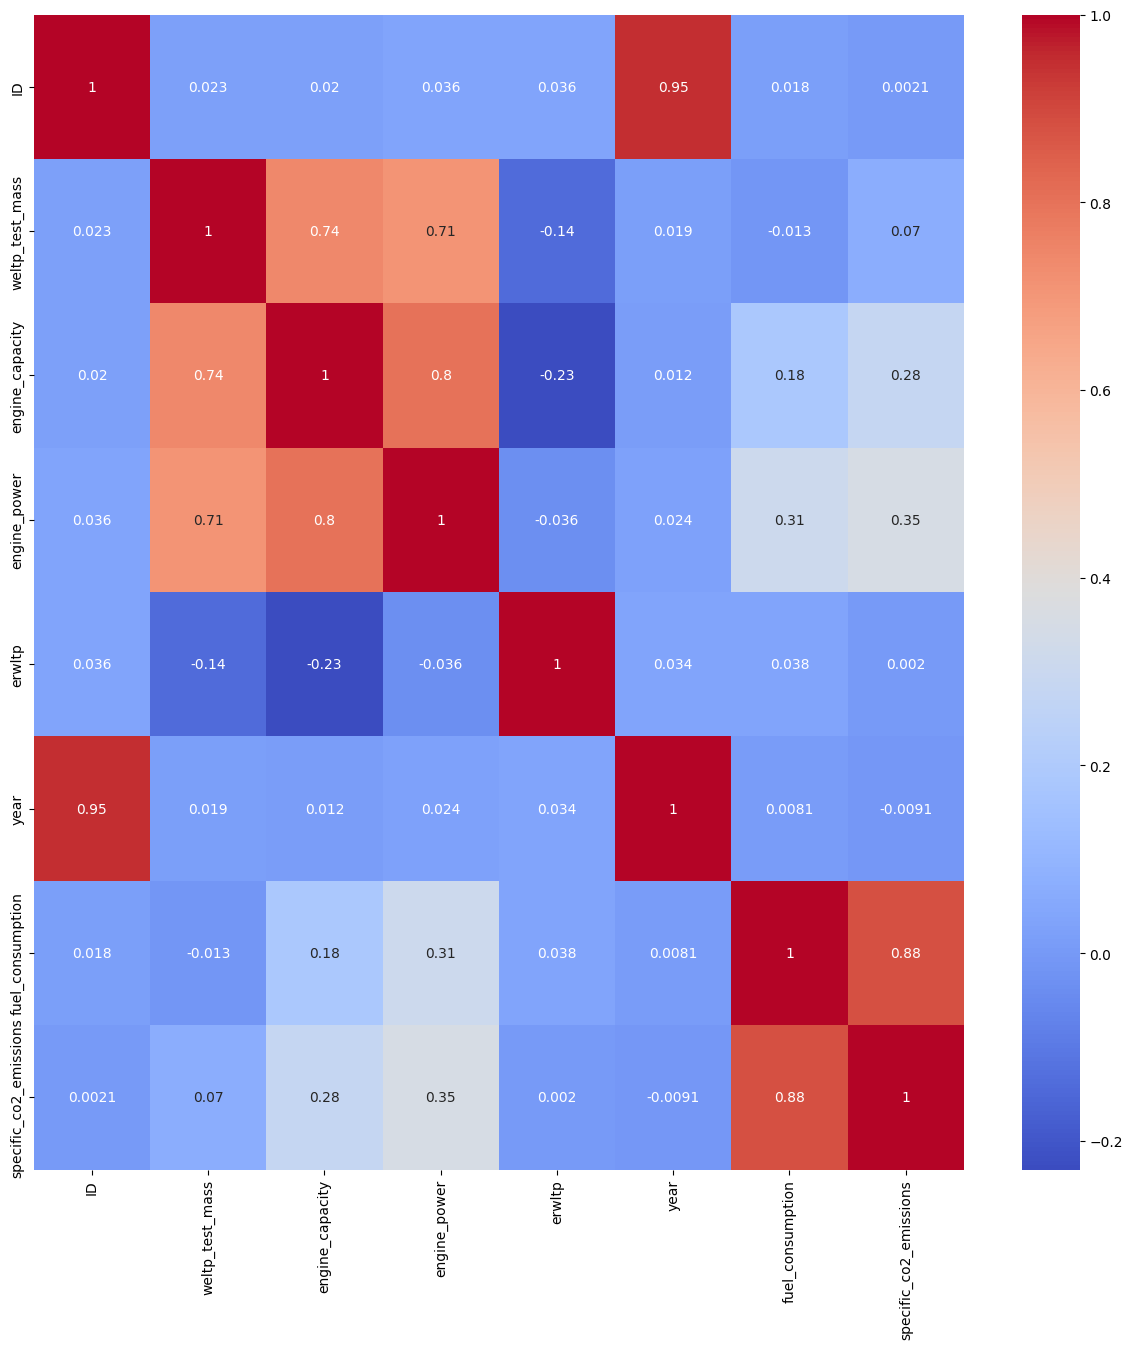

In [ ]:
#checking the correlation of the features with the target variable in a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df_pe_cleaned.select_dtypes(include=["float64", "int64"]).columns
cor = df_pe_cleaned[num_cols].corr()
fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

In [ ]:
#checking the cleande and encoded dataset
X.head()

,member_state,manufacturer_name_eu,vehicle_type,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,weltp_test_mass,engine_capacity,engine_power,erwltp,year
ID,,,,,,,,,,,,
56002959,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002960,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002961,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002962,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068
56002963,11,38,634,0,0,3,118,0.020217,0.121527,-0.074197,-1.572608e-15,-1.211068


In [7]:
#checking for missing values in the final dataset
X.isna().sum()

ID                         0
member_state               0
manufacturer_name_eu       0
vehicle_type               0
category_of_vehicle        0
fuel_type                  0
fuel_mode                  0
innovative_technologies    0
weltp_test_mass            0
engine_capacity            0
engine_power               0
erwltp                     0
year                       0
dtype: int64

In [19]:
# Split the data in train and a test sets unsing y1 as target variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [ ]:
import joblib
joblib.dump(X_train, 'X_train_comb.pkl')
joblib.dump(y_train, 'y_train_comb.pkl')
joblib.dump(X_test, 'X_test_comb.pkl')
joblib.dump(y_test, 'y_test_comb.pkl')


['y_test_comb.pkl']

In [ ]:
#checking the distribution of the target variable
df_pe_cleaned.describe()

,weltp_test_mass,engine_capacity,engine_power,erwltp,year,fuel_consumption,specific_co2_emissions
count,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07,2.586936e+07
mean,1.593060e+03,1.535608e+03,1.036400e+02,1.490881e+00,2.022006e+03,5.400985e+00,1.260269e+02
std,3.432701e+02,5.134010e+02,4.905862e+01,4.235855e-01,8.303425e-01,1.649642e+00,4.120933e+01
min,6.150000e+02,6.470000e+02,8.000000e+00,5.000000e-01,2.021000e+03,1.000000e-01,0.000000e+00
25%,1.349000e+03,1.197000e+03,7.200000e+01,1.180000e+00,2.021000e+03,4.900000e+00,1.150000e+02
50%,1.531000e+03,1.497000e+03,9.600000e+01,1.490881e+00,2.022000e+03,5.400985e+00,1.280000e+02
75%,1.770000e+03,1.968000e+03,1.120000e+02,1.870000e+00,2.023000e+03,6.000000e+00,1.430000e+02
max,4.711000e+03,7.993000e+03,1.177000e+03,3.200000e+00,2.023000e+03,2.520000e+01,5.720000e+02


Text(0.5, 1.0, 'Distribution of specific_co2_emssions ')

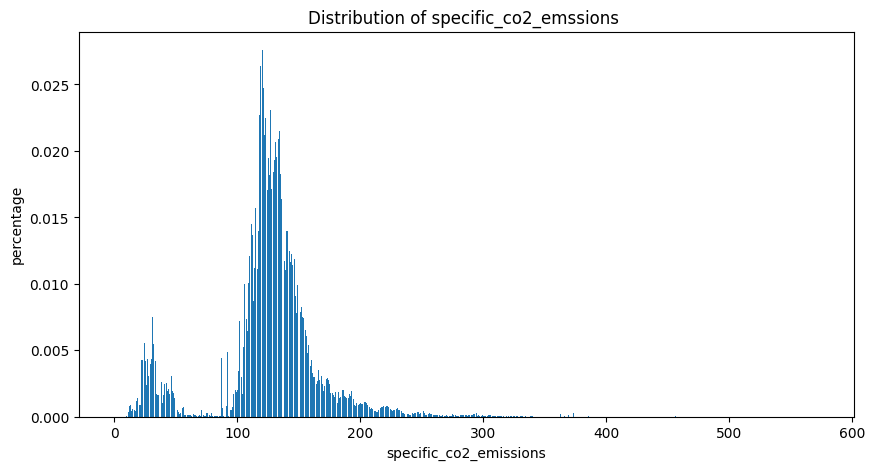

In [36]:
plt.figure(figsize=(10,5))


df =df_pe_cleaned["specific_co2_emissions"].value_counts(normalize=True)
plt.bar(df.index, df.values)
plt.xlabel("specific_co2_emissions")
plt.ylabel("percentage")
plt.title("Distribution of specific_co2_emssions ")

In [10]:
# Trying out LinearRegression model
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# root-mean-squared-Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)




score_train: 0.4011762223422677
score_test: 0.40057206155219716
rmse training data:  31.89529027432369
rmse test data:  31.88140045884544


In [ ]:
#trying out RidgeCV model
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)

#score of RidgeCV
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

#root-mean-squared-Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

alpha used: 10.0
score:  0.39962405231131815
score:  0.40038345060587377
rmse training data:  31.917261105886507
rmse test data:  31.903143265230263


In [ ]:
#trying out Lasso  regression model
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# root-mean-squared-error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


[-1.45331988e-01  6.13633460e-02 -1.41278213e-02  0.00000000e+00
 -4.62644935e+00 -1.41552145e+01 -7.62001120e-03 -1.22448403e+01
  0.00000000e+00  2.24089605e+01  8.50375788e-01 -0.00000000e+00]
alpha used:  1.2705477228357498
score:  0.3901635014673601
score:  0.3907637812553151
rmse training data:  32.17226727730903
rmse test data:  32.153521035666074


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

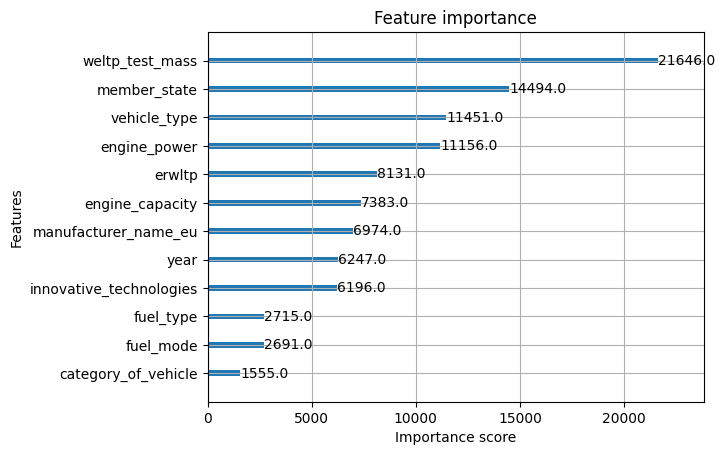

In [ ]:
#trying XGBRegressor model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, learning_rate =0.3,   max_depth=7, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

#displaying feature importances
xgb.plot_importance(model, ax = plt.gca())


In [ ]:
#score of XGBRegressor
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
print("score: ", sc_train)
print("score: ", sc_test)

#root-mean-squared-error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_te = np.sqrt(mean_squared_error(y_pred_test, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

score:  0.9967100660898573
score:  0.9965820237807083
rmse training data:  2.3641901189963757
rmse test data:  2.4071677146392383


In [9]:
# reducing data to 1 percent of the data due to computation time
batch_size= int(0.01*X_train.shape[0])
X_train_batch= X_train[:batch_size]
y_train_batch=y_train[:batch_size]

explained variance:  [6.41944375e+04 2.84368070e+03 7.57732132e+02 4.80951904e+01
 6.82782776e+00 2.28164114e+00 1.87198342e+00 9.43085386e-01
 4.77569552e-01 2.54730531e-01 1.48863879e-01 5.02163477e-02
 3.19766142e-02]


Text(0.5, 1.0, 'Eigenvalues over number of factors')

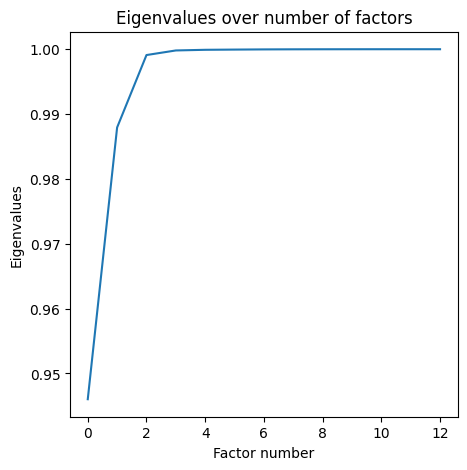

In [11]:
# for runtime reasons I try a dimensionreduction with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pca = PCA()
X_train_batch_re = pca.fit_transform(X_train_batch)
print("explained variance: ", pca.explained_variance_)

plt.figure(figsize = (5,5))
plt.plot(range(X_train_batch.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Factor number")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues over number of factors")

In [ ]:
# gridSearch for different models
import pickle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Modelle und ihre Hyperparameter definieren
models = {
    'XGBRegressoer': (XGBRegressor(), {'n_estimators': [ 500, 1000], 'learning_rate': [0.2, 0.3]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]})
}

# Ergebnisse speichern
results = {}

# Grid-Search für jedes Modell durchführen
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }

In [16]:
models_pkl_file = "modelsGridSearchCV.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(results, f)
    
#Editing the result of the GridSearch    
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Hyperparameters: {result['best_params']}")
    print(f"  Best Score (MSE): {result['best_score']:.4f}\n")

XGBRegressoer:
  Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 1000}
  Best Score (MSE): 3.8275

LinearRegression:
  Best Hyperparameters: {}
  Best Score (MSE): 31.9076

DecisionTreeRegressor:
  Best Hyperparameters: {'max_depth': None}
  Best Score (MSE): 5.1143



In [12]:
# Randomized Search for different models
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ergebnisse ausgeben
results={}

# Modelle und ihre Hyperparameter definieren
models = {
    'XGBRegressoer': (XGBRegressor(), {'n_estimators': [10, 1000], 'learning_rate': [0.1, 0.3, 0.5]}),
    #'LinearRegression': (LinearRegression(), {}),
    'ExtraTreeRegressor': (ExtraTreeRegressor(), {'max_depth': [None, 5, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 100], 'max_depth': [None, 10]})
}

# Randomized Search to save computation power
for model_name, (model, params) in models.items():
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs = 2)
    grid_search.fit(X_train_batch_re, y_train_batch)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }

c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\richa\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [14]:

import pickle
models_pkl_file = "modelsRandomSearchCV.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(results, f)
    
# Edditing the result of the RandomizedSearch
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Beste Hyperparameter: {result['best_params']}")
    print(f"  Bester Score (RMSE): {result['best_score']:.4f}\n")


XGBRegressoer:
  Beste Hyperparameter: {'n_estimators': 1000, 'learning_rate': 0.3}
  Bester Score (RMSE): 3.7113

ExtraTreeRegressor:
  Beste Hyperparameter: {'max_depth': None}
  Bester Score (RMSE): 5.0451



XGBRegressoer:
  Beste Hyperparameter: {'n_estimators': 1000, 'learning_rate': 0.3}
  Bester Score (RMSE): 3.7590

DecisionTreeRegressor:
  Beste Hyperparameter: {'max_depth': None}
  Bester Score (RMSE): 5.0182

In [15]:
# fitting of XGBRegressor with the best parameters
import pickle
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.3)
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Saving the model
models_pkl_file = "modelXGBRegressor.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(results, f)

Mean Absolute Error: 1.3978745258033742
Mean Squared Error: 6.10543452119901
R-squared: 0.9964030877691008


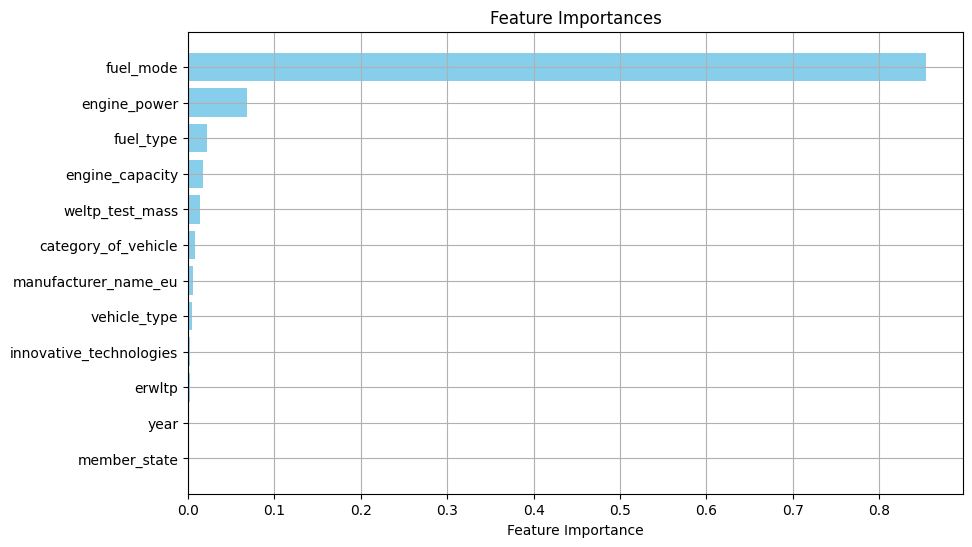

In [20]:
# feature importances for XGBRegressor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # inverting y-axis
plt.grid()
plt.show()

In [16]:
# fitting of DecisionTreeRegressor with best parameters
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = None )
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Saving the model
models_pkl_file = "modelsDecisionTreeRegressor.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(results, f)

Mean Absolute Error: 0.6220472329593973
Mean Squared Error: 4.821455415346821
R-squared: 0.9971595220792262


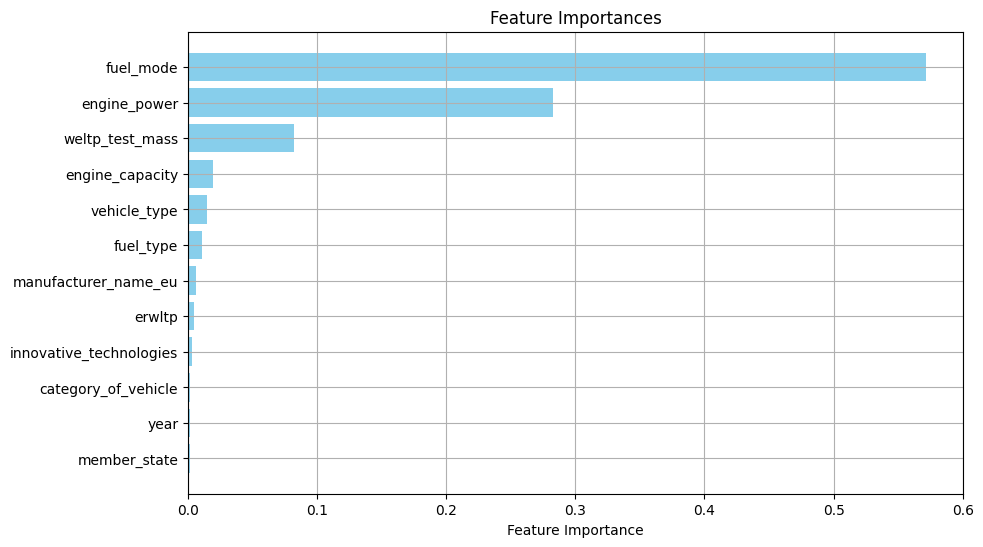

In [ ]:
# feature importances for DecisionTreeRegressor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # inverting y-axis
plt.grid()
plt.show()

In [ ]:
# Displaying the decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [11]:
# fitting of ExtraTreeRegressor with best parameters
from sklearn.tree import ExtraTreeRegressor
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = ExtraTreeRegressor(max_depth = None )
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Saving the model
models_pkl_file = "modelsExtraTreeRegressor.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(models_pkl_file, f)

Mean Absolute Error: 0.6230868667759469
Mean Squared Error: 4.830918948757859
R-squared: 0.9971567623381741


In [22]:
# Machine learning part, building a Sequential Neuronal Network model with keras
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)
   
from tensorflow.python import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error
# reducing data to 10 percent of the data due to computation time
batch_size= int(0.02*X_train.shape[0])
X_train_batch= X_train[:batch_size]
y_train_batch=y_train[:batch_size]

features = len(X_train_batch.columns)
# adjustable parameters
epochs= 15
bs=256
dropout=0.001

# creating a model
model = keras.Sequential()
model.add(Dense(1024, activation="relu", input_shape=(features,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout)) # Korrektur des Dropout-Wertes
model.add(Dense(1, activation='linear')) # Verwendung von linear für Regression

# Ausgabe für spezifische CO2-Emissionen
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_absolute_error"]) # Metrik angepasst
# changing the data format for the model

X_train_batch = X_train_batch.values
y_train_batch = y_train_batch.values  

# model training
model_history = model.fit(X_train_batch, y_train_batch, epochs=epochs, batch_size=bs) # Epochen und Batch-Größe hinzugefügt

# evaluating model
y_pred_train = model.predict(X_train_batch)
y_pred_test = model.predict(X_test)

print("rmse_train: ", np.sqrt(mean_squared_error(y_pred_train, y_train_batch)))
print("rmse_test: ", np.sqrt(mean_squared_error(y_pred_test, y_test)))

# Saving the model
models_pkl_file = "modelNeuronalNetwork.pkl"
with open(models_pkl_file, "wb") as f:
    pickle.dump(results, f)

2.12.0
Epoch 1/15
1617/1617 [==============================] - 21s 13ms/step - loss: 1023.7142 - mean_absolute_error: 22.4509
Epoch 2/15
1617/1617 [==============================] - 20s 12ms/step - loss: 266.5117 - mean_absolute_error: 11.0687
Epoch 3/15
1617/1617 [==============================] - 26s 16ms/step - loss: 155.1175 - mean_absolute_error: 8.5456
Epoch 4/15
1617/1617 [==============================] - 25s 15ms/step - loss: 115.1602 - mean_absolute_error: 7.4367
Epoch 5/15
1617/1617 [==============================] - 24s 15ms/step - loss: 88.9875 - mean_absolute_error: 6.5300
Epoch 6/15
1617/1617 [==============================] - 25s 15ms/step - loss: 79.5348 - mean_absolute_error: 6.2234
Epoch 7/15
1617/1617 [==============================] - 26s 16ms/step - loss: 70.3909 - mean_absolute_error: 5.8567
Epoch 8/15
1617/1617 [==============================] - 25s 15ms/step - loss: 62.7862 - mean_absolute_error: 5.5379
Epoch 9/15
1617/1617 [==============================] - 27

In [24]:
# classification report
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              14336     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 539,649
Trainable params: 539,649
Non-trainable params: 0
_________________________________________________________________


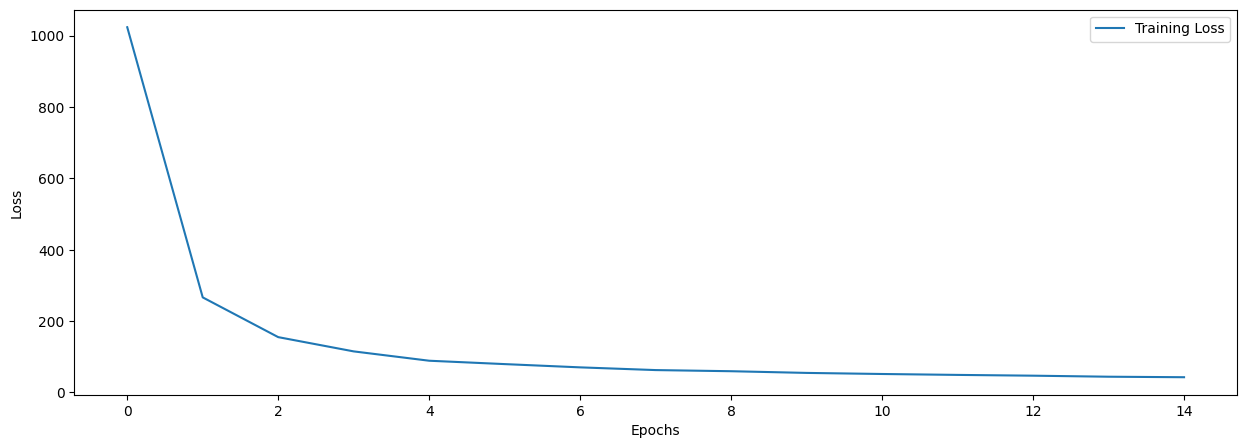

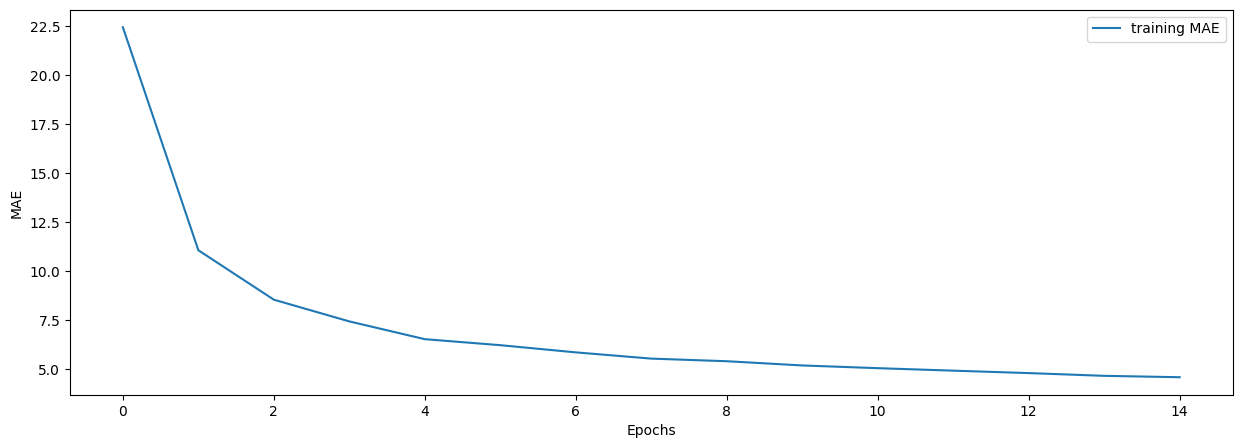

In [25]:
#Displaying the training history
train_loss= model_history.history['loss']
train_mae= model_history.history['mean_absolute_error']


plt.figure(figsize=(15,5))
plt.plot(train_loss, label='Training Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show

plt.figure(figsize=(15,5))
plt.plot(train_mae, label='training MAE')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MAE")  
plt.show() 